In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
from matplotlib import pyplot as plt

In [11]:
%matplotlib inline

In [12]:
df1 = df[df.target==0]
df2 = df[df.target==1]
df3 = df[df.target==2]

In [13]:
df1.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


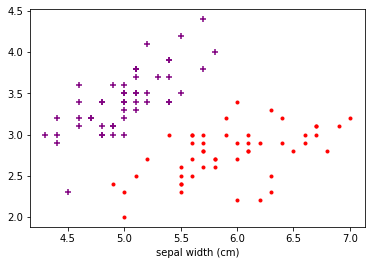

In [14]:
plt.xlabel('sepal length (cm)')
plt.xlabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='purple',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='.')

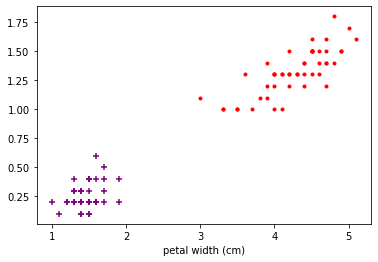

In [15]:
plt.xlabel('petal length (cm)')
plt.xlabel('petal width (cm)')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='purple',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',marker='.')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(['target','flower_names'],axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 10)

In [20]:
len(X_train)

135

In [21]:
len(X_test)

15

In [22]:
from sklearn.svm import SVC

In [23]:
model  = SVC()

In [24]:
model.fit(X_train,y_train)

SVC()

In [25]:
model.predict([['5.1','3.5','1.4','0.2']])

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [26]:
model.predict(X_test)

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0])

In [27]:
y_test

87     1
111    2
10     0
91     1
49     0
60     1
72     1
67     1
39     0
55     1
66     1
142    2
53     1
1      0
19     0
Name: target, dtype: int32

In [28]:
model.score(X_test,y_test)

1.0